# imports

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# magic lines
%load_ext autoreload
%autoreload 2
%matplotlib inline

## import my scripts

In [8]:
#import from my data.py
#https://stackoverflow.com/a/57790804/6163759

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    scripts_path = os.path.join(module_path, "scripts")
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)
    display(sys.path)
    
from data import get_data
from preprocessing import main

['/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/code/lewagon/data/04-Decision-Science/01-Project-Setup/context-and-setup',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/louis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/scripts']

## Load (clean) data

In [101]:
# filename = "select_games_2023-01_to_2024-06_select_cols.csv"
# filepath = os.path.join("..","data", filename)
# all_games_df = pd.read_csv(fileapath)
all_games_df = get_data(df_name = "select_games", descriptor="select_cols")
all_games_df

Looking for all games of chess played on Chess.com by JammyNinja
          between 2023-01 and 2024-10
file /home/louis/code/JammyNinja/Sandbox/Chess_analysis/data/select_games_2023-01_to_2024-10_select_cols.csv already exists!
Do you want to download all games again?
>>(Have you played more since last running this?)
y/n:n


,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,user_rating,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,2023-01-30,https://www.chess.com/game/live/68853253455,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,ivangard57,JammyNinja,black,1030,...,0,1,0,1,0,9,0,"['K', 'Q']",['k'],False
1,2023-03-15,https://www.chess.com/game/live/72649318887,2023-03-15 19:56:11,2023-03-15 20:02:18,blitz,300,axdasilva129,JammyNinja,black,1057,...,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",True
2,2023-03-25,https://www.chess.com/game/live/73488582235,2023-03-25 13:03:42,2023-03-25 13:11:44,blitz,300,Bhashyam2K23,JammyNinja,black,1036,...,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",False
3,2023-03-29,https://www.chess.com/game/live/73819849367,2023-03-29 09:06:37,2023-03-29 09:12:33,blitz,300,JammyNinja,callmedaddycool,white,1034,...,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],False
4,2023-04-04,https://www.chess.com/game/live/74361801303,2023-04-04 15:38:52,2023-04-04 16:05:50,rapid,600+5,JammyNinja,danderosalia,white,1257,...,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,2024-10-26,https://www.chess.com/game/live/123684594039,2024-10-26 12:24:35,2024-10-26 12:26:45,bullet,60,Hansdrewen,JammyNinja,black,1396,...,4,2,3,-1,0,12,15,"['p', 'p', 'p', 'k', 'b', 'p', 'r']","['P', 'P', 'N', 'P', 'R', 'B', 'P', 'K']",True
4231,2024-10-26,https://www.chess.com/game/live/123684618637,2024-10-26 12:26:54,2024-10-26 12:27:56,bullet,60,JammyNinja,TheMorment,white,1388,...,5,4,1,3,-1,20,8,"['r', 'r', 'p', 'p', 'k', 'n', 'p', 'p', 'b']","['P', 'P', 'B', 'P', 'P', 'P', 'K']",False
4232,2024-10-26,https://www.chess.com/game/live/123684631569,2024-10-26 12:28:06,2024-10-26 12:30:02,bullet,60,DARIO7891,JammyNinja,black,1396,...,5,1,4,-3,1,11,21,"['p', 'r', 'p', 'k', 'p', 'p', 'p', 'p']","['R', 'R', 'P', 'P', 'P', 'P', 'B', 'B', 'P', ...",True
4233,2024-10-26,https://www.chess.com/game/live/123684653293,2024-10-26 12:30:08,2024-10-26 12:32:13,bullet,60,PeterSha,JammyNinja,black,1388,...,0,3,2,1,5,18,8,"['R', 'R', 'P', 'P', 'P', 'P', 'B', 'K', 'P']","['k', 'b', 'r']",False


In [11]:
preproc_df = main()
preproc_df = get_data("select_games", "select_cols")

Getting raw data to be preprocessed...
Looking for all games of chess played on Chess.com by JammyNinja
          between 2023-01 and 2024-10
file /home/louis/code/JammyNinja/Sandbox/Chess_analysis/data/all_games_2023-01_to_2024-10_raw.csv already exists!
Do you want to download all games again?
>>(Have you played more since last running this?)
y/n:n
Created win/rating columns:
- higher_rated_colour
- winner
- winner_rating_diff
- user_rating_diff
- user_rating
- user_win
- user_colour
Created moves columns:
- move_numbers
- white_moves
- white_clock
- black_moves
- black_clock
- w_cstl_side
- w_cstl_move
- b_cstl_side
- b_cstl_move
Created final position columns:
- winner_ttl_pieces_count
- loser_ttl_pieces_count
- winner_pawns_count
- loser_pawns_count
- winner_pieces_only_count
- loser_pieces_only_count
- pieces_count_diff
- pawns_count_diff
- winner_material_ttl
- loser_material_ttl
- winner_pcs
- loser_pcs
Created castling columns:
- user_castled
- opp_castled

Started with:
- dat

In [13]:
display(preproc_df.columns)
all_games_df = preproc_df.copy()

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win'],
      dtype='object')

In [14]:
test_game = all_games_df.iloc[10]
test_game

date                                                               2023-05-18
url                               https://www.chess.com/game/live/78138789735
start_time                                                2023-05-18 08:52:47
end_time                                                  2023-05-18 08:53:41
time_class                                                              rapid
time_control                                                            600+5
white_username                                                     JammyNinja
black_username                                                  cippeciop2005
user_colour                                                             white
user_rating                                                              1294
result                                                                    1-0
winner                                                                  white
higher_rated_colour                                             

# Rating evolution over time, per game (not per day)

In [15]:
all_games_df

,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,user_rating,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,2023-01-30,https://www.chess.com/game/live/68853253455,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,ivangard57,JammyNinja,black,1030,...,0,1,0,1,0,9,0,"['K', 'Q']",['k'],False
1,2023-03-15,https://www.chess.com/game/live/72649318887,2023-03-15 19:56:11,2023-03-15 20:02:18,blitz,300,axdasilva129,JammyNinja,black,1057,...,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",True
2,2023-03-25,https://www.chess.com/game/live/73488582235,2023-03-25 13:03:42,2023-03-25 13:11:44,blitz,300,Bhashyam2K23,JammyNinja,black,1036,...,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",False
3,2023-03-29,https://www.chess.com/game/live/73819849367,2023-03-29 09:06:37,2023-03-29 09:12:33,blitz,300,JammyNinja,callmedaddycool,white,1034,...,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],False
4,2023-04-04,https://www.chess.com/game/live/74361801303,2023-04-04 15:38:52,2023-04-04 16:05:50,rapid,600+5,JammyNinja,danderosalia,white,1257,...,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,2024-10-26,https://www.chess.com/game/live/123684594039,2024-10-26 12:24:35,2024-10-26 12:26:45,bullet,60,Hansdrewen,JammyNinja,black,1396,...,4,2,3,-1,0,12,15,"['p', 'p', 'p', 'k', 'b', 'p', 'r']","['P', 'P', 'N', 'P', 'R', 'B', 'P', 'K']",True
4231,2024-10-26,https://www.chess.com/game/live/123684618637,2024-10-26 12:26:54,2024-10-26 12:27:56,bullet,60,JammyNinja,TheMorment,white,1388,...,5,4,1,3,-1,20,8,"['r', 'r', 'p', 'p', 'k', 'n', 'p', 'p', 'b']","['P', 'P', 'B', 'P', 'P', 'P', 'K']",False
4232,2024-10-26,https://www.chess.com/game/live/123684631569,2024-10-26 12:28:06,2024-10-26 12:30:02,bullet,60,DARIO7891,JammyNinja,black,1396,...,5,1,4,-3,1,11,21,"['p', 'r', 'p', 'k', 'p', 'p', 'p', 'p']","['R', 'R', 'P', 'P', 'P', 'P', 'B', 'B', 'P', ...",True
4233,2024-10-26,https://www.chess.com/game/live/123684653293,2024-10-26 12:30:08,2024-10-26 12:32:13,bullet,60,PeterSha,JammyNinja,black,1388,...,0,3,2,1,5,18,8,"['R', 'R', 'P', 'P', 'P', 'P', 'B', 'K', 'P']","['k', 'b', 'r']",False


In [16]:
rating_df = all_games_df[["date", "user_rating", "time_class"]].copy()

rating_df.sort_values(by="date", ascending=True, inplace=True)

display(rating_df.value_counts("time_class"))
rating_df.head(10)

time_class
bullet    2623
blitz     1600
rapid       12
dtype: int64

,date,user_rating,time_class
0,2023-01-30,1030,blitz
1,2023-03-15,1057,blitz
2,2023-03-25,1036,blitz
3,2023-03-29,1034,blitz
4,2023-04-04,1257,rapid
5,2023-04-16,1277,rapid
6,2023-04-17,1296,rapid
7,2023-04-26,1251,rapid
8,2023-05-03,1287,rapid
9,2023-05-05,1266,rapid


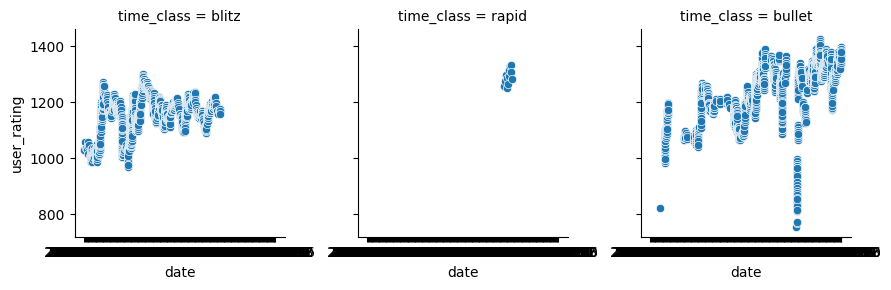

In [17]:
fgrid = sns.FacetGrid(rating_df, col="time_class")
fgrid.map_dataframe(sns.scatterplot, x="date" ,y="user_rating")

In [18]:
rating_df.date.unique()[:10]

array(['2023-01-30', '2023-03-15', '2023-03-25', '2023-03-29',
       '2023-04-04', '2023-04-16', '2023-04-17', '2023-04-26',
       '2023-05-03', '2023-05-05'], dtype=object)

In [19]:
rating_df["game_number"] = rating_df.index

rating_df.groupby(by="date").first()

# rating_df

,user_rating,time_class,game_count
date,,,
2023-01-30,1030,blitz,0
2023-03-15,1057,blitz,1
2023-03-25,1036,blitz,2
2023-03-29,1034,blitz,3
2023-04-04,1257,rapid,4
...,...,...,...
2024-10-11,1364,bullet,4200
2024-10-12,1357,bullet,4201
2024-10-18,1325,bullet,4217


In [20]:
def get_xticks_for_df(df):
    df = df.copy()
    #add game count column
    df["game_count"] = df.index
    #group by date and keep index of first game that day
    dense_df = df.groupby(by="date").first()
    
    locations = dense_df["game_count"].values
    
    dates = pd.to_datetime(dense_df.index)
    
#     ticks = dense_df.index.values
    ticks = dates.strftime('%d/%m/%y')
    
    return ticks, locations
get_xticks_for_df(rating_df)

(Index(['30/01/23', '15/03/23', '25/03/23', '29/03/23', '04/04/23', '16/04/23',
        '17/04/23', '26/04/23', '03/05/23', '05/05/23',
        ...
        '27/09/24', '29/09/24', '01/10/24', '03/10/24', '04/10/24', '11/10/24',
        '12/10/24', '18/10/24', '20/10/24', '26/10/24'],
       dtype='object', name='date', length=219),
 array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          12,   13,   15,   16,   17,   18,   20,   21,   22,   33,   44,
          53,   54,   62,   72,   94,  107,  153,  240,  305,  367,  410,
         433,  467,  497,  501,  502,  504,  513,  514,  518,  524,  529,
         530,  545,  557,  562,  573,  583,  600,  625,  641,  670,  690,
         721,  744,  745,  746,  747,  748,  750,  768,  787,  813,  855,
         905,  977, 1030, 1067, 1140, 1235, 1277, 1297, 1324, 1349, 1366,
        1406, 1458, 1490, 1513, 1516, 1519, 1520, 1555, 1573, 1587, 1594,
        1607, 1608, 1622, 1634, 1652, 1660, 1664, 1671, 1675, 1686, 1706,


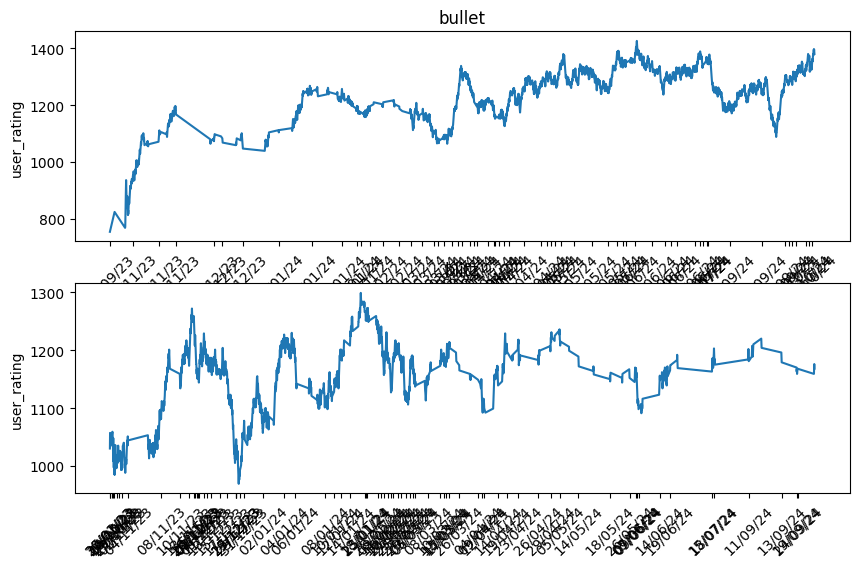

In [21]:
# time_classes = rating_df.value_counts("time_class").index
time_classes = ["bullet", 'blitz']

fig, axs = plt.subplots(len(time_classes), 1, figsize=(10,6)) # axs is a (1,2) nd-array

for i,time in enumerate(time_classes):
    #data and plot
    time_df = rating_df[rating_df["time_class"] == time]
    sns.lineplot(data=time_df, x=time_df.index, y=time_df.user_rating, ax=axs[i])
    
    x_ticks, x_locations = get_xticks_for_df(time_df)
    
    #plot aesthetic
    axs[i].set_xticks(x_locations[::2])
    axs[i].set_xticklabels(x_ticks[::2])
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_title(time)
                     

Consider plotting dates on y axis and evolving rating vertically like a tree!?

# Material

## pawns at end of match

In [23]:
all_games_df.columns

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win'],
      dtype='object')

In [25]:
all_games_df.iloc[0]

date                                                         2023-01-30
url                         https://www.chess.com/game/live/68853253455
start_time                                          2023-01-30 21:29:25
end_time                                            2023-01-30 21:39:52
time_class                                                        blitz
time_control                                                        300
white_username                                               ivangard57
black_username                                               JammyNinja
user_colour                                                       black
user_rating                                                        1030
result                                                              1-0
winner                                                            white
higher_rated_colour                                               black
white_rating                                                    

<AxesSubplot:xlabel='winner_pawns_count', ylabel='pawns_count_diff'>

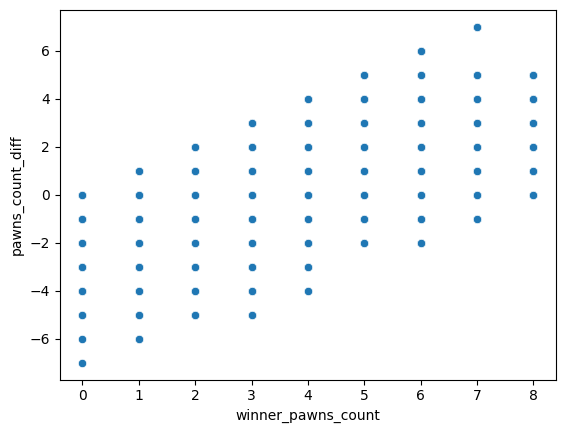

In [26]:
sns.scatterplot(x="winner_pawns_count",y="pawns_count_diff", data=all_games_df)

## Material difference

In [70]:
all_games_df.columns

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win', 'opening letter', 'opening_letter'],
      dtype='object')

In [90]:
material_cols = [
    #meta
    'time_class'
    ,'winner_rating_diff'
    ,'user_rating_diff'
    ,'user_win'
    #material
    ,'winner_ttl_pieces_count', 'loser_ttl_pieces_count'
    ,'winner_pawns_count', 'loser_pawns_count'
    ,'winner_pieces_only_count','loser_pieces_only_count'
    ,'pieces_count_diff', 'pawns_count_diff'
    ,'winner_material_ttl', 'loser_material_ttl'
    ,'winner_pcs', 'loser_pcs'
    ]
material_df = all_games_df[material_cols]
material_df.tail(3)

,time_class,winner_rating_diff,user_rating_diff,user_win,winner_ttl_pieces_count,loser_ttl_pieces_count,winner_pawns_count,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs
4232,bullet,26,26,True,8,10,6,5,1,4,-3,1,11,21,"['p', 'r', 'p', 'k', 'p', 'p', 'p', 'p']","['R', 'R', 'P', 'P', 'P', 'P', 'B', 'B', 'P', ..."
4233,bullet,32,-32,False,9,3,5,0,3,2,1,5,18,8,"['R', 'R', 'P', 'P', 'P', 'P', 'B', 'K', 'P']","['k', 'b', 'r']"
4234,bullet,16,-16,False,9,8,6,5,2,2,0,1,20,19,"['p', 'p', 'p', 'p', 'k', 'p', 'q', 'p', 'r']","['P', 'P', 'P', 'P', 'Q', 'P', 'K', 'R']"


In [91]:
material_df.dtypes

time_class                  object
winner_rating_diff           int64
user_rating_diff             int64
user_win                      bool
winner_ttl_pieces_count      int64
loser_ttl_pieces_count       int64
winner_pawns_count           int64
loser_pawns_count            int64
winner_pieces_only_count     int64
loser_pieces_only_count      int64
pieces_count_diff            int64
pawns_count_diff             int64
winner_material_ttl          int64
loser_material_ttl           int64
winner_pcs                  object
loser_pcs                   object
dtype: object

In [92]:
material_df['material_diff'] = material_df.loc[:,'winner_material_ttl'] - material_df.loc[:,'loser_material_ttl']
material_df

/tmp/ipykernel_3082/2677640724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_df['material_diff'] = material_df.loc[:,'winner_material_ttl'] - material_df.loc[:,'loser_material_ttl']


,time_class,winner_rating_diff,user_rating_diff,user_win,winner_ttl_pieces_count,loser_ttl_pieces_count,winner_pawns_count,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,material_diff
0,blitz,-8,8,False,2,1,0,0,1,0,1,0,9,0,"['K', 'Q']",['k'],9
1,blitz,58,58,True,7,2,4,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",11
2,blitz,122,-122,False,8,4,5,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",12
3,blitz,-28,28,False,8,1,0,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],25
4,rapid,90,90,True,5,6,2,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,bullet,-2,-2,True,7,8,4,4,2,3,-1,0,12,15,"['p', 'p', 'p', 'k', 'b', 'p', 'r']","['P', 'P', 'N', 'P', 'R', 'B', 'P', 'K']",-3
4231,bullet,-1,1,False,9,7,4,5,4,1,3,-1,20,8,"['r', 'r', 'p', 'p', 'k', 'n', 'p', 'p', 'b']","['P', 'P', 'B', 'P', 'P', 'P', 'K']",12
4232,bullet,26,26,True,8,10,6,5,1,4,-3,1,11,21,"['p', 'r', 'p', 'k', 'p', 'p', 'p', 'p']","['R', 'R', 'P', 'P', 'P', 'P', 'B', 'B', 'P', ...",-10
4233,bullet,32,-32,False,9,3,5,0,3,2,1,5,18,8,"['R', 'R', 'P', 'P', 'P', 'P', 'B', 'K', 'P']","['k', 'b', 'r']",10


<AxesSubplot:xlabel='winner_rating_diff', ylabel='material_diff'>

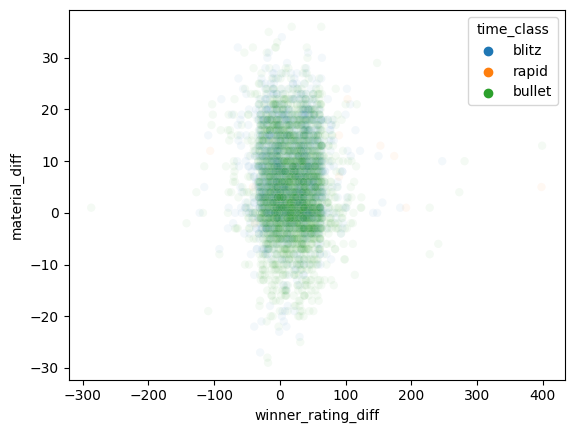

In [98]:
sns.scatterplot(x='winner_rating_diff', y='material_diff', data=material_df,
               alpha=0.05, hue='time_class')

# openings

In [29]:
all_games_df['opening_letter'] = all_games_df['opening_code'].apply(lambda x :x[0])
all_games_df['opening_letter']

0       A
1       C
2       B
3       C
4       A
       ..
4230    D
4231    B
4232    A
4233    A
4234    B
Name: opening_letter, Length: 4235, dtype: object

In [55]:
agg_dict = {
    "user_win" : "mean", "loser_pcs" : "count"
}
all_games_df.groupby(by="opening_letter").agg(agg_dict).rename(columns={"loser_pcs": "n_games"})

,user_win,n_games
opening_letter,,
A,0.515313,751
B,0.523077,1365
C,0.481834,1156
D,0.480000,950
E,0.384615,13


In [57]:
agg_dict = {
    "user_win" : "mean", "result" : "count", "opening_name" : "first"
}

openings_df = all_games_df.groupby(by=["opening_letter", "opening_code"]).agg(agg_dict).rename(columns={"result" : "n_games"})
openings_df

user_win  n_games  \
opening_letter opening_code                      
A              A00           0.504587      218   
               A01           0.510204       49   
               A02           0.000000        2   
               A03           0.500000       24   
               A04           0.347826       23   
...                               ...      ...   
E              E24           1.000000        1   
               E40           1.000000        1   
               E50           1.000000        1   
               E61           1.000000        1   
               E90           0.000000        1   

                                                                  opening_name  
opening_letter opening_code                                                     
A              A00                           Van-t-Kruijs-Opening-1...e5-2.Bc4  
               A01           Nimzowitsch-Larsen-Attack-Classical-Variation-...  
               A02                                   Birds-Opening-1...f5-2.d4  
               A03           Birds-Opening-Dutch-Variation-2.Nf3-g6-3.e3-Bg...  
               A04           Reti-Opening-Queenside-Fianchetto-Variation-2....  
...                                                                        ...  
E              E24               Nimzo-Indian-Defense-Samisch-Variation-5...b6  
               E40                            Nimzo-Indian-Defense-Normal-Line  
               E50              Nimzo-Indian-Defense-Normal-Line-4...O-O-5.Nf3  
               E61                       Kings-Indian-Defense-Normal-Variation  
               E90           Kings-Indian-Defense-Normal-Variation-4.e4-d6-...  

[140 rows x 3 columns]

In [58]:
openings_df.index.get_level_values(0)

Index(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       ...
       'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
      dtype='object', name='opening_letter', length=140)

In [59]:
openings = ["A", "B", "C", "D", "E"]
for letter in openings:
    display(openings_df.loc[letter, :].sort_values(by="n_games", ascending=False))

,user_win,n_games,opening_name
opening_code,,,
A00,0.504587,218,Van-t-Kruijs-Opening-1...e5-2.Bc4
A40,0.528302,159,Queens-Pawn-Opening-English-Defense-3.e4-Bb7-4...
A06,0.612500,80,Reti-Opening-1...d5
A01,0.510204,49,Nimzowitsch-Larsen-Attack-Classical-Variation-...
A45,0.571429,49,Indian-Game-2.Bf4
A43,0.400000,25,Old-Benoni-Defense-2.e3-e6
A03,0.500000,24,Birds-Opening-Dutch-Variation-2.Nf3-g6-3.e3-Bg...
A04,0.347826,23,Reti-Opening-Queenside-Fianchetto-Variation-2....
A41,0.650000,20,Queens-Pawn-Opening-1...d6


,user_win,n_games,opening_name
opening_code,,,
B01,0.528771,643,Scandinavian-Defense-Mieses-Kotrc-Variation-3.Nc3
B00,0.536000,125,Owens-Defense-2.d4-Bb7-3.f3
B06,0.570248,121,Modern-Defense-with-1-e4-2.d4-Bg7
B10,0.479452,73,Caro-Kann-Defense-2.Nf3-d5
B12,0.549296,71,Caro-Kann-Defense-Advance-Short-Variation-with...
B07,0.500000,68,Pirc-Defense-Modern-Defense-Geller-System-2......
B20,0.508475,59,Sicilian-Defense-Snyder-Variation-2...e5-3.Bb2
B23,0.511628,43,Closed-Sicilian-Defense-Traditional-Line-3.Nf3...
B22,0.473684,38,Alapin-Sicilian-Defense-2...e6-3.d4-cxd4-4.cxd4


,user_win,n_games,opening_name
opening_code,,,
C25,0.503145,159,Vienna-Game-2...d6-3.Bc4
C00,0.519084,131,French-Defense-Normal-Variation
C20,0.483871,124,Kings-Pawn-Opening-Leonardis-Variation
C50,0.442478,113,Giuoco-Piano-Game-Giuoco-Pianissimo-Variation
C23,0.393939,66,Bishops-Opening
C41,0.433333,60,Philidor-Defense-3.d4-Bg4
C45,0.404255,47,Scotch-Game
C02,0.550000,40,French-Defense-Advance-Paulsen-Attack-5...Qb6
C28,0.512821,39,Bishops-Opening-Berlin-Vienna-Hybrid-Variation...


,user_win,n_games,opening_name
opening_code,,,
D00,0.492308,455,Queens-Pawn-Opening-Accelerated-London-System
D02,0.480144,277,Queens-Pawn-Opening-Zukertort-Chigorin-Variati...
D10,0.431818,44,Slav-Defense-3.e3-e6
D20,0.333333,30,Queens-Gambit-Accepted-Old-Variation-3...e6-4....
D06,0.363636,22,Queens-Gambit-Declined-Baltic-Defense
D07,0.555556,18,Queens-Gambit-Declined-Chigorin-Defense-3.e3
D31,0.352941,17,Queens-Gambit-Declined-Semi-Slav-Defense-Accel...
D11,0.437500,16,Slav-Defense-Modern-Line-3...Bg4
D04,0.714286,14,Colle-System-3...c6-4.Bd3-Bg4


,user_win,n_games,opening_name
opening_code,,,
E00,0.0,4,Indian-Game-East-Indian-Defense-3.Nc3-b6
E21,0.5,2,Nimzo-Indian-Defense-Three-Knights-Variation-4...
E01,0.0,1,Catalan-Opening-Closed-4...dxc4-5.Nf3-c6-6.O-O
E10,0.0,1,Indian-Game-East-Indian-Anti-Nimzo-Indian-Vari...
E24,1.0,1,Nimzo-Indian-Defense-Samisch-Variation-5...b6
E40,1.0,1,Nimzo-Indian-Defense-Normal-Line
E50,1.0,1,Nimzo-Indian-Defense-Normal-Line-4...O-O-5.Nf3
E61,1.0,1,Kings-Indian-Defense-Normal-Variation
E90,0.0,1,Kings-Indian-Defense-Normal-Variation-4.e4-d6-...


In [60]:
openings_df

user_win  n_games  \
opening_letter opening_code                      
A              A00           0.504587      218   
               A01           0.510204       49   
               A02           0.000000        2   
               A03           0.500000       24   
               A04           0.347826       23   
...                               ...      ...   
E              E24           1.000000        1   
               E40           1.000000        1   
               E50           1.000000        1   
               E61           1.000000        1   
               E90           0.000000        1   

                                                                  opening_name  
opening_letter opening_code                                                     
A              A00                           Van-t-Kruijs-Opening-1...e5-2.Bc4  
               A01           Nimzowitsch-Larsen-Attack-Classical-Variation-...  
               A02                                   Birds-Opening-1...f5-2.d4  
               A03           Birds-Opening-Dutch-Variation-2.Nf3-g6-3.e3-Bg...  
               A04           Reti-Opening-Queenside-Fianchetto-Variation-2....  
...                                                                        ...  
E              E24               Nimzo-Indian-Defense-Samisch-Variation-5...b6  
               E40                            Nimzo-Indian-Defense-Normal-Line  
               E50              Nimzo-Indian-Defense-Normal-Line-4...O-O-5.Nf3  
               E61                       Kings-Indian-Defense-Normal-Variation  
               E90           Kings-Indian-Defense-Normal-Variation-4.e4-d6-...  

[140 rows x 3 columns]

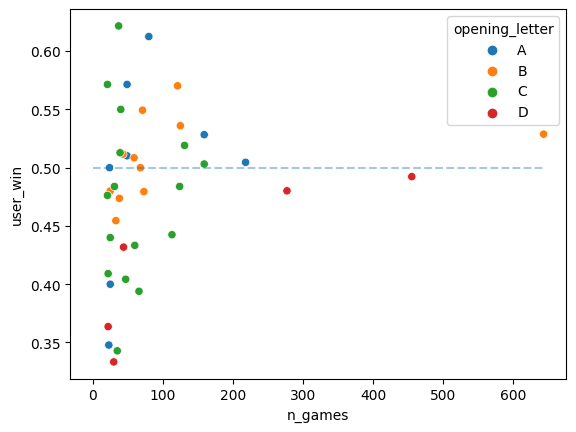

In [69]:
sns.scatterplot(x="n_games", y="user_win", data=openings_df.query("n_games > 20"), hue='opening_letter')
plt.hlines(y=0.5, xmin=0, xmax=openings_df.n_games.max(), linestyle='--', alpha=0.4)

# Moves

In [100]:
all_games_df.columns

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win', 'opening letter', 'opening_letter'],
      dtype='object')